In [40]:
import math
import pandas as pd
df = pd.read_csv("airlinedelaycauses_DelayedFlights.csv")
print(df)
print(df.describe())



         Unnamed: 0  Year  Month  DayofMonth  DayOfWeek  DepTime  CRSDepTime  \
0                 0  2008      1           3          4   2003.0        1955   
1                 1  2008      1           3          4    754.0         735   
2                 2  2008      1           3          4    628.0         620   
3                 4  2008      1           3          4   1829.0        1755   
4                 5  2008      1           3          4   1940.0        1915   
...             ...   ...    ...         ...        ...      ...         ...   
1936753     7009710  2008     12          13          6   1250.0        1220   
1936754     7009717  2008     12          13          6    657.0         600   
1936755     7009718  2008     12          13          6   1007.0         847   
1936756     7009726  2008     12          13          6   1251.0        1240   
1936757     7009727  2008     12          13          6   1110.0        1103   

         ArrTime  CRSArrTime UniqueCarr

In [48]:

df_cleaned=df.dropna(subset = ['CarrierDelay','NASDelay', 'WeatherDelay', 'SecurityDelay', 'LateAircraftDelay'], how = 'all')
print(df_cleaned)

         Unnamed: 0  Year  Month  DayofMonth  DayOfWeek  DepTime  CRSDepTime  \
3                 4  2008      1           3          4   1829.0        1755   
5                 6  2008      1           3          4   1937.0        1830   
7                11  2008      1           3          4   1644.0        1510   
9                16  2008      1           3          4   1452.0        1425   
11               18  2008      1           3          4   1323.0        1255   
...             ...   ...    ...         ...        ...      ...         ...   
1936751     7009705  2008     12          13          6    921.0         830   
1936752     7009709  2008     12          13          6   1552.0        1520   
1936753     7009710  2008     12          13          6   1250.0        1220   
1936754     7009717  2008     12          13          6    657.0         600   
1936755     7009718  2008     12          13          6   1007.0         847   

         ArrTime  CRSArrTime UniqueCarr

In [76]:
df_cancelled = df.loc[df['Cancelled'] == 1] 

df_cancelled_percentage = (len(df_cancelled)/len(df)) * 100

print (df_cancelled_percentage) 

cancellation_by_month = df.groupby('Month')['Cancelled'].agg(['sum', 'count'])
cancellation_by_month['percentage'] = (cancellation_by_month['sum'] / cancellation_by_month['count']) * 100
print(cancellation_by_month)

0.032683484462178544
       sum   count  percentage
Month                         
1        0  183527    0.000000
2        0  189534    0.000000
3        0  200842    0.000000
4        0  155264    0.000000
5        0  153072    0.000000
6        0  200914    0.000000
7        0  182945    0.000000
8        0  162648    0.000000
9        0   95539    0.000000
10      59  103525    0.056991
11      94  105563    0.089046
12     480  203385    0.236006


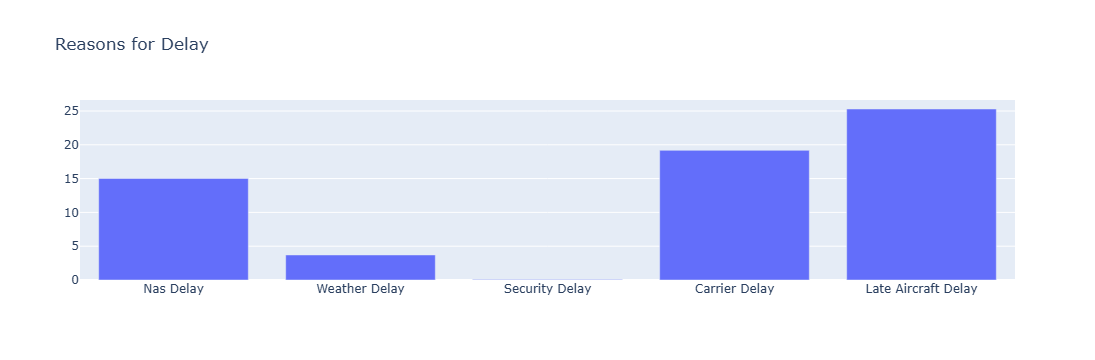

In [50]:
#target value : flight cancellation 
#Also lenght of delays 

#cause of delay average is carrier delay  and Late aircraft delay 

#graph to compar delay cuases 
import plotly.graph_objects as pt
import numpy
import matplotlib.pyplot as plt

characteristics = {
    'Nas Delay' : (df_cleaned['NASDelay'].mean() ),
    'Weather Delay' : (df_cleaned['WeatherDelay'].mean() ),
    'Security Delay' :  (df_cleaned['SecurityDelay'].mean() ),
    'Carrier Delay' :  (df_cleaned['CarrierDelay'].mean() ),
    'Late Aircraft Delay' : (df_cleaned['LateAircraftDelay'].mean()) 
}

fig = pt.Figure(data=[
    pt.Bar(name='Delay Causes',
           x=list(characteristics.keys()),
           y=list(characteristics.values()))
])

fig.update_layout(barmode='group', title='Reasons for Delay')
fig.show()

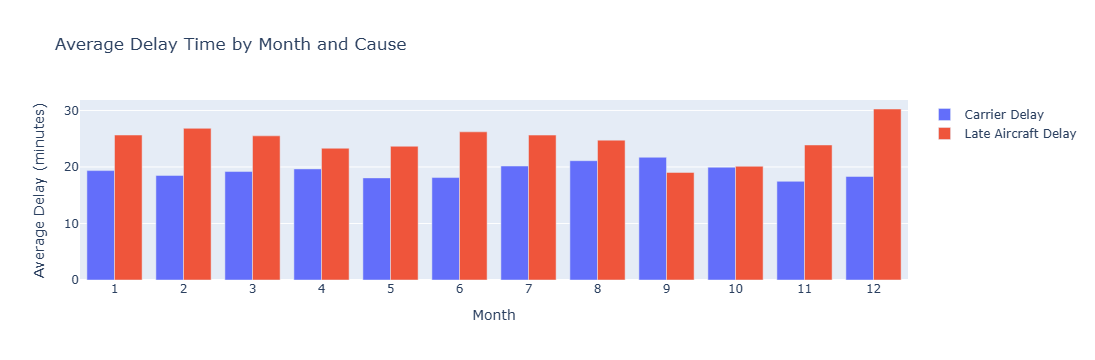

In [58]:
#map late aircraft delay to the month 
import plotly.graph_objects as go


monthly_delays = df_cleaned.groupby('Month')[['CarrierDelay', 'LateAircraftDelay']].mean()

fig = go.Figure()

fig.add_trace(go.Bar(
    name='Carrier Delay',
    x=monthly_delays.index,
    y=monthly_delays['CarrierDelay']
))

fig.add_trace(go.Bar(
    name='Late Aircraft Delay',
    x=monthly_delays.index,
    y=monthly_delays['LateAircraftDelay']
))

fig.update_layout(
    barmode='group',
    title='Average Delay Time by Month and Cause',
    xaxis_title='Month',
    yaxis_title='Average Delay (minutes)',
    xaxis = dict(tickmode='linear')
)

fig.show()

#Feb, June, and december are the most delayed by lat aircraft 

In [64]:
from sklearn.preprocessing import StandardScaler
X=df.copy()
X= X.drop(columns=['Revenue'])
X=pd.get_dummies(X,columns=['Month', 'VisitorType'], drop_first=True)
X["Weekend"]=X["Weekend"].astype(int)
X = X.astype(float, errors="ignore")
scaler=StandardScaler()
X_scaled=scaler.fit_transform(X)

0
